---
title: "Practice Activity 8.2"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  echo: true
  warning: false
  message: false
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
!pip install palmerpenguins

In [2]:
import palmerpenguins as pg
import pandas as pd
df = pg.load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:

df_dummy = pd.get_dummies(df)
df_cleaned = df_dummy.dropna()
df_cleaned.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
# Code Here

In [4]:
from sklearn.model_selection import train_test_split

# Identify species columns
species_cols = [col for col in df_cleaned.columns if 'species_' in col]

# Reconstruct the 'species' column (y)
y = df_cleaned[species_cols].idxmax(axis=1).str.replace('species_', '')

# Create the feature DataFrame (X)
X = df_cleaned.drop(columns=species_cols)

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\ny_train value counts:\n", y_train.value_counts())
print("\ny_test value counts:\n", y_test.value_counts())

Shape of X_train: (239, 10)
Shape of X_test: (103, 10)
Shape of y_train: (239,)
Shape of y_test: (103,)

y_train value counts:
 Adelie       106
Gentoo        86
Chinstrap     47
Name: count, dtype: int64

y_test value counts:
 Adelie       45
Gentoo       37
Chinstrap    21
Name: count, dtype: int64


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train kNN model with K=3
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X_train, y_train)
print("kNN model with K=3 trained successfully.")

# Initialize and train kNN model with K=5
knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(X_train, y_train)
print("kNN model with K=5 trained successfully.")

kNN model with K=3 trained successfully.
kNN model with K=5 trained successfully.


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model with max_depth=3
dt_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_3.fit(X_train, y_train)
print("Decision Tree model with max_depth=3 trained successfully.")

# Initialize and train Decision Tree model with max_depth=5
dt_model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_5.fit(X_train, y_train)
print("Decision Tree model with max_depth=5 trained successfully.")

Decision Tree model with max_depth=3 trained successfully.
Decision Tree model with max_depth=5 trained successfully.



--- Evaluating kNN with K=3 ---
Confusion Matrix:
 [[36  7  2]
 [14  7  0]
 [ 3  1 33]]
Overall Accuracy: 0.7379

Metrics for Adelie:
  Precision: 0.6792
  Recall:    0.8000
  F1-score:  0.7347

Metrics for Chinstrap:
  Precision: 0.4667
  Recall:    0.3333
  F1-score:  0.3889

Metrics for Gentoo:
  Precision: 0.9429
  Recall:    0.8919
  F1-score:  0.9167
  AUC for Adelie: 0.8492
  AUC for Chinstrap: 0.7454
  AUC for Gentoo: 0.9537

--- Evaluating kNN with K=5 ---
Confusion Matrix:
 [[41  2  2]
 [15  6  0]
 [ 2  1 34]]
Overall Accuracy: 0.7864

Metrics for Adelie:
  Precision: 0.7069
  Recall:    0.9111
  F1-score:  0.7961

Metrics for Chinstrap:
  Precision: 0.6667
  Recall:    0.2857
  F1-score:  0.4000

Metrics for Gentoo:
  Precision: 0.9444
  Recall:    0.9189
  F1-score:  0.9315
  AUC for Adelie: 0.8665
  AUC for Chinstrap: 0.7660
  AUC for Gentoo: 0.9928

--- Evaluating Decision Tree with max_depth=3 ---
Confusion Matrix:
 [[45  0  0]
 [ 1 20  0]
 [ 0  0 37]]
Overall Accuracy:

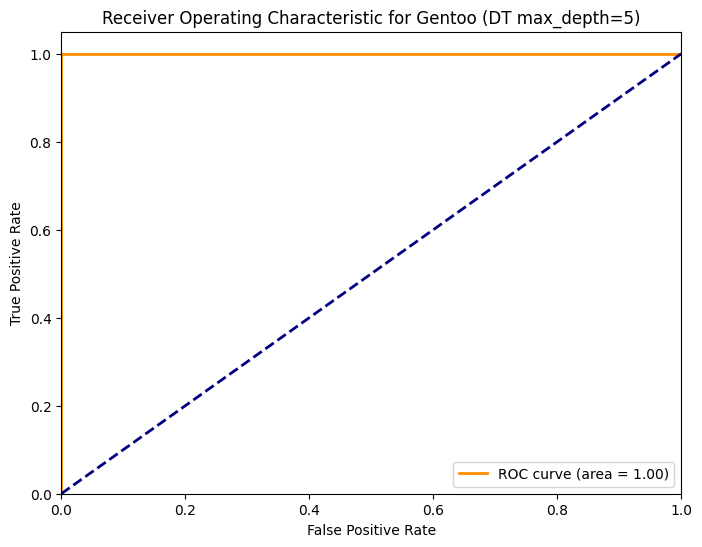

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n--- Evaluating {model_name} ---")

    # Make predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Overall Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-score for each species
    # Get unique classes for consistent indexing in reports
    classes = sorted(y_test.unique())

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=classes, average=None)

    for i, cls in enumerate(classes):
        print(f"\nMetrics for {cls}:")
        print(f"  Precision: {precision[i]:.4f}")
        print(f"  Recall:    {recall[i]:.4f}")
        print(f"  F1-score:  {f1_score[i]:.4f}")

    # AUC for each species (requires probability predictions)
    try:
        y_prob = model.predict_proba(X_test)
        for i, cls in enumerate(classes):
            # One-vs-Rest AUC calculation
            y_test_binary = (y_test == cls).astype(int)
            # Ensure the class probability is for the positive class (cls)
            # The class_map will ensure we get the correct column from y_prob
            class_idx = model.classes_.tolist().index(cls)
            auc_score = roc_auc_score(y_test_binary, y_prob[:, class_idx])
            print(f"  AUC for {cls}: {auc_score:.4f}")
    except AttributeError:
        print("Model does not support predict_proba, skipping AUC calculation.")


# Evaluate all models
evaluate_model(knn_model_3, X_test, y_test, "kNN with K=3")
evaluate_model(knn_model_5, X_test, y_test, "kNN with K=5")
evaluate_model(dt_model_3, X_test, y_test, "Decision Tree with max_depth=3")
evaluate_model(dt_model_5, X_test, y_test, "Decision Tree with max_depth=5")

# ROC Plot for a selected species (e.g., 'Gentoo') using dt_model_5
selected_species = 'Gentoo'

plt.figure(figsize=(8, 6))
if hasattr(dt_model_5, 'predict_proba'):
    y_prob_dt5 = dt_model_5.predict_proba(X_test)

    # Get the index for the selected species in the model's classes
    if selected_species in dt_model_5.classes_:
        species_idx = dt_model_5.classes_.tolist().index(selected_species)
        fpr, tpr, _ = roc_curve((y_test == selected_species).astype(int), y_prob_dt5[:, species_idx])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {selected_species} (DT max_depth=5)')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"Selected species '{selected_species}' not found in model classes.")
else:
    print("dt_model_5 does not support predict_proba for ROC plot.")

I got a perfect model, but I think thats just because the decision tree was too high that it isoldated each one? Not sure, going to check with teacher on Monday